In [1]:
import pandas as pd
from datetime import timedelta

In [12]:
# get the github raw data link
u1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
u2 = '-2020.csv'
# update the date for dataset collection
date = '09-24'
url = u1 + date + u2
df = pd.read_csv(url)
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-25 04:23:00,33.93911,67.709953,39170,1451,32619,5100.0,Afghanistan,100.620779,3.704366
1,NaN,NaN,NaN,Albania,2020-09-25 04:23:00,41.15330,20.168300,12921,370,7239,5312.0,Albania,448.988811,2.863555
2,NaN,NaN,NaN,Algeria,2020-09-25 04:23:00,28.03390,1.659600,50579,1703,35544,13332.0,Algeria,115.342752,3.367010
3,NaN,NaN,NaN,Andorra,2020-09-25 04:23:00,42.50630,1.521800,1753,53,1203,497.0,Andorra,2268.815117,3.023388
4,NaN,NaN,NaN,Angola,2020-09-25 04:23:00,-11.20270,17.873900,4475,162,1503,2810.0,Angola,13.615784,3.620112


In [13]:
# filter out targeted states
states = ['New York','New Jersey','Massachusetts','Virginia','Maryland','Pennsylvania','Connecticut','Delaware','Rhode Island','Washington DC','West Virginia']
foo = pd.DataFrame(df[df['Province_State'].isin(states)],columns=df.columns).reset_index()
# clean the Last_Update column into date
foo['Last_Update'] = foo['Last_Update'].apply(lambda x: pd.to_datetime(x).date()) - timedelta(days=1)
foo

,index,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,945,9001.0,Fairfield,Connecticut,US,2020-09-24,41.268099,-73.388117,19985,1421,0,18564.0,"Fairfield, Connecticut, US",2118.554231,7.110333
1,946,9003.0,Hartford,Connecticut,US,2020-09-24,41.802830,-72.731039,14506,1434,0,13072.0,"Hartford, Connecticut, US",1626.743821,9.885565
2,947,9005.0,Litchfield,Connecticut,US,2020-09-24,41.793753,-73.245148,1856,141,0,1715.0,"Litchfield, Connecticut, US",1029.207078,7.596983
3,948,9007.0,Middlesex,Connecticut,US,2020-09-24,41.459497,-72.537149,1564,193,0,1371.0,"Middlesex, Connecticut, US",962.840750,12.340153
4,949,9009.0,New Haven,Connecticut,US,2020-09-24,41.408033,-72.936204,14319,1115,0,13204.0,"New Haven, Connecticut, US",1675.212955,7.786857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,3704,51830.0,Williamsburg,Virginia,US,2020-09-24,37.281313,-76.709051,178,7,0,171.0,"Williamsburg, Virginia, US",1190.316972,3.932584
341,3705,51840.0,Winchester,Virginia,US,2020-09-24,39.170545,-78.173251,494,4,0,490.0,"Winchester, Virginia, US",1759.384572,0.809717
342,3706,51195.0,Wise,Virginia,US,2020-09-24,36.974615,-82.624105,398,9,0,389.0,"Wise, Virginia, US",1064.655057,2.261307
343,3707,51197.0,Wythe,Virginia,US,2020-09-24,36.915820,-81.078341,229,4,0,225.0,"Wythe, Virginia, US",798.354483,1.746725


In [14]:
foo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                345 non-null    int64  
 1   FIPS                 344 non-null    float64
 2   Admin2               345 non-null    object 
 3   Province_State       345 non-null    object 
 4   Country_Region       345 non-null    object 
 5   Last_Update          345 non-null    object 
 6   Lat                  336 non-null    float64
 7   Long_                336 non-null    float64
 8   Confirmed            345 non-null    int64  
 9   Deaths               345 non-null    int64  
 10  Recovered            345 non-null    int64  
 11  Active               345 non-null    float64
 12  Combined_Key         345 non-null    object 
 13  Incidence_Rate       336 non-null    float64
 14  Case-Fatality_Ratio  341 non-null    float64
dtypes: float64(6), int64(4), object(5)
memor

In [15]:
# combine the files
# out = pd.DataFrame() ##### !!!quote it after your first run!
out = pd.concat([out,foo])

In [16]:
out

,index,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,945,9001.0,Fairfield,Connecticut,US,2020-09-23,41.268099,-73.388117,19949,1421,0,18528.0,"Fairfield, Connecticut, US",2114.737971,7.123164
1,946,9003.0,Hartford,Connecticut,US,2020-09-23,41.802830,-72.731039,14456,1434,0,13022.0,"Hartford, Connecticut, US",1621.136680,9.919757
2,947,9005.0,Litchfield,Connecticut,US,2020-09-23,41.793753,-73.245148,1849,140,0,1709.0,"Litchfield, Connecticut, US",1025.325370,7.571660
3,948,9007.0,Middlesex,Connecticut,US,2020-09-23,41.459497,-72.537149,1560,193,0,1367.0,"Middlesex, Connecticut, US",960.378241,12.371795
4,949,9009.0,New Haven,Connecticut,US,2020-09-23,41.408033,-72.936204,14294,1114,0,13180.0,"New Haven, Connecticut, US",1672.288147,7.793480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,3704,51830.0,Williamsburg,Virginia,US,2020-09-24,37.281313,-76.709051,178,7,0,171.0,"Williamsburg, Virginia, US",1190.316972,3.932584
341,3705,51840.0,Winchester,Virginia,US,2020-09-24,39.170545,-78.173251,494,4,0,490.0,"Winchester, Virginia, US",1759.384572,0.809717
342,3706,51195.0,Wise,Virginia,US,2020-09-24,36.974615,-82.624105,398,9,0,389.0,"Wise, Virginia, US",1064.655057,2.261307
343,3707,51197.0,Wythe,Virginia,US,2020-09-24,36.915820,-81.078341,229,4,0,225.0,"Wythe, Virginia, US",798.354483,1.746725


In [ ]:
# when you're done, export to csv
out.to_csv('weekxcleaned.csv',index=False,encoding='utf-8-sig')

## Combine the cleaned dataset

In [94]:
import pandas as pd

In [104]:
w1 = pd.read_csv('week1cleaned.csv')
w1.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,9001.0,Fairfield,Connecticut,US,2020-09-01,41.268099,-73.388117,18939,1415,0,17524.0,"Fairfield, Connecticut, US",2007.670682,7.471355
1,9003.0,Hartford,Connecticut,US,2020-09-01,41.802830,-72.731039,13529,1425,0,12104.0,"Hartford, Connecticut, US",1517.180281,10.532929
2,9005.0,Litchfield,Connecticut,US,2020-09-01,41.793753,-73.245148,1713,138,0,1575.0,"Litchfield, Connecticut, US",949.909334,8.056042
3,9007.0,Middlesex,Connecticut,US,2020-09-01,41.459497,-72.537149,1466,192,0,1274.0,"Middlesex, Connecticut, US",902.509296,13.096862
4,9009.0,New Haven,Connecticut,US,2020-09-01,41.408032,-72.936204,13711,1109,0,12602.0,"New Haven, Connecticut, US",1604.081628,8.088396


In [132]:
w2 = pd.read_csv('week2cleaned.csv')
w2.columns = w1.columns
w2.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,9001.0,Fairfield,Connecticut,US,2020-09-09,41.268099,-73.388117,19135,1417,0,17718,"Fairfield, Connecticut, US",2028.448097,7.405278
1,9003.0,Hartford,Connecticut,US,2020-09-09,41.802830,-72.731039,13771,1428,0,12343,"Hartford, Connecticut, US",1544.318844,10.369617
2,9005.0,Litchfield,Connecticut,US,2020-09-09,41.793753,-73.245148,1751,139,0,1612,"Litchfield, Connecticut, US",970.981462,7.938321
3,9007.0,Middlesex,Connecticut,US,2020-09-09,41.459497,-72.537149,1496,193,0,1303,"Middlesex, Connecticut, US",920.978108,12.901070
4,9009.0,New Haven,Connecticut,US,2020-09-09,41.408033,-72.936204,13858,1109,0,12749,"New Haven, Connecticut, US",1621.279498,8.002598


In [137]:
w3 = pd.read_csv('week3cleaned.csv')
w3.drop(['index'],axis=1,inplace = True)
w3.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,9001.0,Fairfield,Connecticut,US,2020-09-15,41.268099,-73.388117,19558,1419,0,18139.0,"Fairfield, Connecticut, US",2073.289150,7.255343
1,9003.0,Hartford,Connecticut,US,2020-09-15,41.802830,-72.731039,14099,1431,0,12668.0,"Hartford, Connecticut, US",1581.101691,10.149656
2,9005.0,Litchfield,Connecticut,US,2020-09-15,41.793753,-73.245148,1798,140,0,1658.0,"Litchfield, Connecticut, US",997.044357,7.786429
3,9007.0,Middlesex,Connecticut,US,2020-09-15,41.459497,-72.537149,1527,193,0,1334.0,"Middlesex, Connecticut, US",940.062548,12.639162
4,9009.0,New Haven,Connecticut,US,2020-09-15,41.408032,-72.936204,14082,1111,0,12971.0,"New Haven, Connecticut, US",1647.485777,7.889504


In [117]:
w4 = pd.read_csv('week4cleaned.csv')
w4.tail()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
2802,54101.0,Webster,West Virginia,US,2020-09-28,38.493709,-80.420202,8,0,0,8,"Webster, West Virginia, US",98.595021,0.000000
2803,54103.0,Wetzel,West Virginia,US,2020-09-28,39.606577,-80.640165,55,0,0,55,"Wetzel, West Virginia, US",365.084633,0.000000
2804,54105.0,Wirt,West Virginia,US,2020-09-28,39.027750,-81.374739,12,0,0,12,"Wirt, West Virginia, US",206.150146,0.000000
2805,54107.0,Wood,West Virginia,US,2020-09-28,39.209679,-81.516284,366,6,0,360,"Wood, West Virginia, US",438.228885,1.639344
2806,54109.0,Wyoming,West Virginia,US,2020-09-28,37.612327,-81.545111,118,3,0,115,"Wyoming, West Virginia, US",578.601549,2.542373


In [122]:
w5 = pd.read_csv('week5cleaned.csv')
w5.drop(['index'],axis=1,inplace = True)
w5.shape

(2406, 14)

In [123]:
w5.tail()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
2401,54101.0,Webster,West Virginia,US,2020-10-04,38.493709,-80.420202,8,0,0,8.0,"Webster, West Virginia, US",98.595021,0.000000
2402,54103.0,Wetzel,West Virginia,US,2020-10-04,39.606577,-80.640165,66,0,0,66.0,"Wetzel, West Virginia, US",438.101560,0.000000
2403,54105.0,Wirt,West Virginia,US,2020-10-04,39.027750,-81.374739,12,0,0,12.0,"Wirt, West Virginia, US",206.150146,0.000000
2404,54107.0,Wood,West Virginia,US,2020-10-04,39.209679,-81.516284,382,6,0,376.0,"Wood, West Virginia, US",457.386432,1.570681
2405,54109.0,Wyoming,West Virginia,US,2020-10-04,37.612327,-81.545111,129,4,0,125.0,"Wyoming, West Virginia, US",632.538982,3.100775


In [133]:
out = pd.concat([w1,w2,w3,w4,w5])
out.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,9001.0,Fairfield,Connecticut,US,2020-09-01,41.268099,-73.388117,18939,1415,0,17524.0,"Fairfield, Connecticut, US",2007.670682,7.471355
1,9003.0,Hartford,Connecticut,US,2020-09-01,41.802830,-72.731039,13529,1425,0,12104.0,"Hartford, Connecticut, US",1517.180281,10.532929
2,9005.0,Litchfield,Connecticut,US,2020-09-01,41.793753,-73.245148,1713,138,0,1575.0,"Litchfield, Connecticut, US",949.909334,8.056042
3,9007.0,Middlesex,Connecticut,US,2020-09-01,41.459497,-72.537149,1466,192,0,1274.0,"Middlesex, Connecticut, US",902.509296,13.096862
4,9009.0,New Haven,Connecticut,US,2020-09-01,41.408032,-72.936204,13711,1109,0,12602.0,"New Haven, Connecticut, US",1604.081628,8.088396


In [134]:
out.shape

(13634, 14)

<AxesSubplot:>

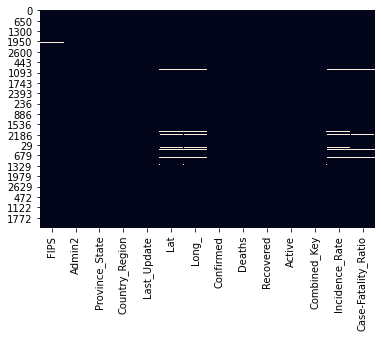

In [135]:
# Visualizing missing data
import seaborn as sns
sns.heatmap(out.isnull(),cbar = False)
#indicating some of the latitude and longtitude are missing

In [136]:
out.to_csv('covid_cleaned.csv',index=False,encoding='utf-8-sig')